
## 📖1.PaddleHub介绍

<font size=4 face="仿宋">
  
通过API便捷地获取PaddlePaddle生态下的预训练模型，完成模型的管理和一键预测。配合使用Fine-tune API，可以基于大规模预训练模型快速完成迁移学习，让预训练模型能更好地服务于用户特定场景的应用。

* 基于优秀的社区生态和持续的投入，飞桨(PaddlePaddle)已经有一批可以直接调用的模型，可以快速实现想法。

* 这些模型被根据不同方向存在不同的套件中，例如：基于NLP的PaddleNLP，基于GAN的PaddleGAN等.

> 如果遇到关键点检测，分割，目标识别等任务，不妨先看看[PaddleHub模型库](https://www.paddlepaddle.org.cn/hublist)

</font>

### ⏲️ 1.1 安装说明

<font size=4 face="仿宋">
  
* PaddlePaddle 安装

   本项目依赖于 PaddlePaddle 2.2 及以上版本，请参考 [安装指南](https://www.paddlepaddle.org.cn/install/quick?docurl=/documentation/docs/zh/install/pip/windows-pip.html) 进行安装

* PaddleNLP 安装


   pip install --upgrade paddlenlp -i https://pypi.org/simple


* 环境依赖

    Python的版本要求 3.7+
  
</font>

In [36]:
# 需要的paddlenlp升级
!pip install --upgrade pip --user
!pip install --upgrade paddlenlp -i https://pypi.org/simple


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [37]:
#分词处理
from paddlenlp.datasets import load_dataset
import pandas as pd
import jieba

def read(data_path):
    data_ori = pd.read_csv(data_path, names=['first','second'], header=None,sep='\t').astype(str)
    temp = {}
    for i in range(len(data_ori)):
        temp_data_0  = jieba.lcut(data_ori.iloc[i,0]) # 0 是 逗
        temp_data_1  = jieba.lcut(data_ori.iloc[i,1]) # 1 是 捧
        yield {'first': '\x02'.join(temp_data_0), 'second': '\x02'.join(temp_data_1)}

In [38]:
# data_path为read()方法的参数
train_ds = load_dataset(read, data_path='work/train_file.txt',lazy=False)

In [39]:
for idx in range(2):
    print(train_ds[idx])
    print()

{'first': '\ufeff\x02“\x02信仰\x02坚定\x02、\x02无限忠诚\x02”\x02的\x02政治\x02品格', 'second': '“\x02立党为公\x02、\x02执政为民\x02”\x02的\x02为政\x02守则\x02，\x02“\x02鞠躬尽瘁\x02、\x02死而后已\x02”\x02的\x02献身精神\x02，\x02“\x02两袖清风\x02、\x02清正廉洁\x02”\x02的\x02高尚情操\x02。'}

{'first': '遇到\x02急难\x02繁重\x02的\x02事情\x02能\x02担起来', 'second': '遇到\x02千头万绪\x02的\x02事情\x02能理\x02清楚\x02，\x02遇到\x02新\x02情况\x02新\x02问题\x02能\x02有\x02效应\x02对\x02。'}



In [40]:
# 查看前五条数据集
data_ori = pd.read_csv('work/train_file.txt', names=['first','second'], header=None,sep='\t')
print(data_ori.describe() )
data_ori.head()

        first                              second
count    1463                                1462
unique   1366                                1395
top     “服务牌”  “逢山开路、遇水搭桥”的攻坚精神，“撸起袖子、扑下身子”的实干态度。
freq        4                                   3


,first,second
1,﻿“信仰坚定、无限忠诚”的政治品格,“立党为公、执政为民”的为政守则，“鞠躬尽瘁、死而后已”的献身精神，“两袖清风、清正廉洁”的...
2,遇到急难繁重的事情能担起来,遇到千头万绪的事情能理清楚，遇到新情况新问题能有效应对。
3,复杂局面前领导驾驭的能力,风险挑战前权衡决策的能力，发展机遇前当机立断的能力。
4,敢于啃“硬骨头”斗争意识,善于“涉险滩”斗争本领、勇于“闯难关”斗争魄力。
5,以平衡的心态对待得失,以豁达的胸怀看待名利，以奉献的精神服务社会。


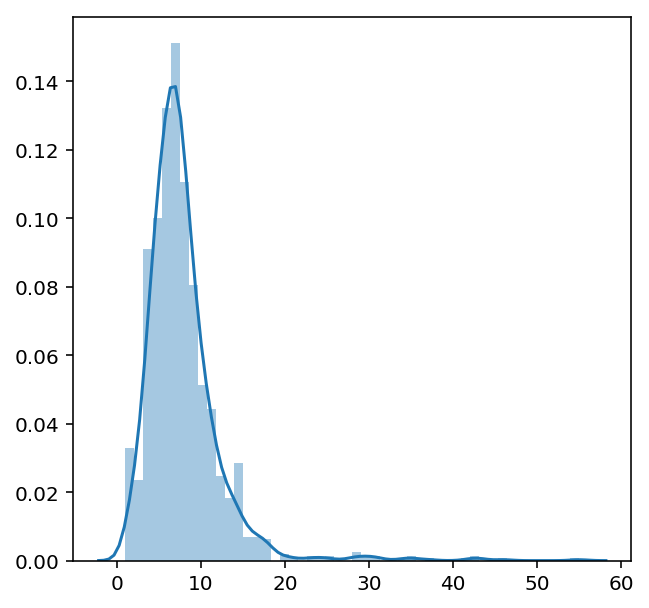

In [41]:
# 查看数据的长度分布，修改输入的最大长度
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
len_list = []
for i in range(len(data_ori)):
    temp_data  = data_ori.iloc[i,0] # 0 是 逗 1 是捧
    len_list.append(len(temp_data))
        
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.distplot(len_list)
plt.show()


## 📖3.模型实现及训练

In [42]:
import paddlenlp

# 设置模型名称
MODEL_NAME = 'unimo-text-1.0'
tokenizer = paddlenlp.transformers.UNIMOTokenizer.from_pretrained(MODEL_NAME)

[2022-03-16 16:12:55,815] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/unimo-text-1.0/unimo-text-1.0-vocab.txt


In [43]:
from functools import partial
from utils import convert_example

train_trans_func = partial(
    convert_example,
    tokenizer=tokenizer,
    mode='train')

train_ds.map(train_trans_func, lazy=False, num_workers=4)

In [44]:
idx = 1 # 查看输出
print(train_ds[idx]['input_ids'])
print(train_ds[idx]['token_type_ids'])
print(train_ds[idx]['position_ids'])
print(train_ds[idx]['masked_positions'])
print(train_ds[idx]['labels'])
print()

[1, 825, 45, 978, 526, 1115, 118, 5, 104, 182, 52, 675, 200, 61, 2, 1, 825, 45, 608, 306, 211, 1659, 5, 104, 182, 52, 38, 334, 1302, 4, 825, 45, 102, 182, 617, 102, 358, 281, 52, 9, 344, 149, 51, 12043, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[825, 45, 608, 306, 211, 1659, 5, 104, 182, 52, 38, 334, 1302, 4, 825, 45, 102, 182, 617, 102, 358, 281, 52, 9, 344, 149, 51, 12043, 3]



In [45]:
import paddle
from utils import batchify_fn

batch_size = 32

# 定义BatchSampler
train_batch_sampler = paddle.io.DistributedBatchSampler(
        train_ds, batch_size=batch_size, shuffle=True)

# 定义batchify_fn
train_collate_fn = partial(batchify_fn, pad_val=0, mode='train')

# 构造DataLoader
train_data_loader = paddle.io.DataLoader(
    dataset=train_ds,
    batch_sampler=train_batch_sampler,
    collate_fn=train_collate_fn,
    return_list=True)

In [46]:
from paddlenlp.transformers import UNIMOLMHeadModel
model = UNIMOLMHeadModel.from_pretrained(MODEL_NAME)

[2022-03-16 16:12:56,998] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/unimo-text-1.0/unimo-text-1.0.pdparams


In [47]:
# 训练过程中的最大学习率
learning_rate = 1e-4 

# 训练轮次
epochs = 20

# 学习率预热比例
warmup_proportion = 0.02

# 权重衰减系数，类似模型正则项策略，避免模型过拟合
weight_decay = 0.01

num_training_steps = len(train_data_loader) * epochs

# 学习率衰减策略
lr_scheduler = paddlenlp.transformers.LinearDecayWithWarmup(learning_rate, num_training_steps, warmup_proportion)

decay_params = [
    p.name for n, p in model.named_parameters()
    if not any(nd in n for nd in ["bias", "norm"])
]
optimizer = paddle.optimizer.AdamW(
    learning_rate=lr_scheduler,
    parameters=model.parameters(),
    weight_decay=weight_decay,
    apply_decay_param_fun=lambda x: x in decay_params)

In [48]:
from utils import evaluation
import paddle.nn.functional as F
from tqdm import tqdm
for epoch in range(0, epochs):
    for batch in tqdm(train_data_loader,desc='epoch:'+str(epoch+1)):
        labels = batch[-1]
        logits = model(*batch[:-1])
        labels = paddle.nn.functional.one_hot(labels, num_classes=logits.shape[-1])
        labels = paddle.nn.functional.label_smooth(labels)
        loss = F.cross_entropy(logits, labels, soft_label=True)

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.clear_grad()

    ppl = paddle.exp(loss)
    print(" epoch: %d, ppl: %.4f, loss: %.5f" % (epoch + 1, ppl, loss))


epoch:1: 100%|██████████| 46/46 [00:06<00:00,  7.36it/s]


 epoch: 1, ppl: 219.9372, loss: 5.39334


epoch:2:   0%|          | 0/46 [00:00<?, ?it/s]epoch:2: 100%|██████████| 46/46 [00:07<00:00,  6.77it/s]


 epoch: 2, ppl: 95.7261, loss: 4.56149


epoch:3: 100%|██████████| 46/46 [00:07<00:00,  6.15it/s]


 epoch: 3, ppl: 69.8074, loss: 4.24574


epoch:4: 100%|██████████| 46/46 [00:07<00:00,  6.42it/s]


 epoch: 4, ppl: 35.5140, loss: 3.56993


epoch:5:   2%|▏         | 1/46 [00:00<00:05,  8.38it/s]epoch:5: 100%|██████████| 46/46 [00:07<00:00,  7.24it/s]


 epoch: 5, ppl: 30.0104, loss: 3.40154


epoch:6:   0%|          | 0/46 [00:00<?, ?it/s]epoch:6: 100%|██████████| 46/46 [00:07<00:00,  7.37it/s]


 epoch: 6, ppl: 14.2624, loss: 2.65762


epoch:7:   2%|▏         | 1/46 [00:00<00:06,  7.20it/s]epoch:7: 100%|██████████| 46/46 [00:07<00:00,  6.49it/s]


 epoch: 7, ppl: 14.7331, loss: 2.69010


epoch:8:   2%|▏         | 1/46 [00:00<00:04,  9.10it/s]epoch:8: 100%|██████████| 46/46 [00:07<00:00,  6.13it/s]


 epoch: 8, ppl: 15.3445, loss: 2.73075


epoch:9:   2%|▏         | 1/46 [00:00<00:05,  8.77it/s]epoch:9: 100%|██████████| 46/46 [00:07<00:00,  5.26it/s]


 epoch: 9, ppl: 14.2762, loss: 2.65859


epoch:10:   2%|▏         | 1/46 [00:00<00:06,  6.85it/s]epoch:10: 100%|██████████| 46/46 [00:07<00:00,  7.18it/s]


 epoch: 10, ppl: 10.7235, loss: 2.37244


epoch:11:   0%|          | 0/46 [00:00<?, ?it/s]epoch:11: 100%|██████████| 46/46 [00:07<00:00,  6.07it/s]


 epoch: 11, ppl: 8.5095, loss: 2.14118


epoch:12:   2%|▏         | 1/46 [00:00<00:06,  6.46it/s]epoch:12: 100%|██████████| 46/46 [00:07<00:00,  6.51it/s]


 epoch: 12, ppl: 8.9229, loss: 2.18862


epoch:13:   2%|▏         | 1/46 [00:00<00:05,  8.94it/s]epoch:13: 100%|██████████| 46/46 [00:07<00:00,  6.90it/s]


 epoch: 13, ppl: 7.8944, loss: 2.06615


epoch:14:   0%|          | 0/46 [00:00<?, ?it/s]epoch:14: 100%|██████████| 46/46 [00:07<00:00,  6.10it/s]


 epoch: 14, ppl: 5.9311, loss: 1.78021


epoch:15:   0%|          | 0/46 [00:00<?, ?it/s]epoch:15: 100%|██████████| 46/46 [00:07<00:00,  6.56it/s]


 epoch: 15, ppl: 6.6890, loss: 1.90046


epoch:16:   0%|          | 0/46 [00:00<?, ?it/s]epoch:16: 100%|██████████| 46/46 [00:07<00:00,  8.02it/s]


 epoch: 16, ppl: 6.0960, loss: 1.80764


epoch:17:   0%|          | 0/46 [00:00<?, ?it/s]epoch:17: 100%|██████████| 46/46 [00:07<00:00,  7.04it/s]


 epoch: 17, ppl: 5.8053, loss: 1.75877


epoch:18:   2%|▏         | 1/46 [00:00<00:04,  9.81it/s]epoch:18: 100%|██████████| 46/46 [00:07<00:00,  6.41it/s]


 epoch: 18, ppl: 5.8210, loss: 1.76148


epoch:19:   2%|▏         | 1/46 [00:00<00:05,  8.02it/s]epoch:19: 100%|██████████| 46/46 [00:07<00:00,  7.00it/s]


 epoch: 19, ppl: 5.7747, loss: 1.75349


epoch:20:   4%|▍         | 2/46 [00:00<00:03, 11.18it/s]epoch:20: 100%|██████████| 46/46 [00:07<00:00,  7.02it/s]


 epoch: 20, ppl: 5.7264, loss: 1.74509


In [52]:
paddle.save(model.state_dict(), './textgen.pdparams')
print("==>Trained model saved in ./textgen.pdparams")

==>Trained model saved in ./textgen.pdparams


In [9]:
#模型加载
import paddle
import paddlenlp

# 设置模型名称
MODEL_NAME = 'unimo-text-1.0'
tokenizer = paddlenlp.transformers.UNIMOTokenizer.from_pretrained(MODEL_NAME)
layer_state_dict = paddle.load("textgen.pdparams")
from paddlenlp.transformers import UNIMOLMHeadModel
model = UNIMOLMHeadModel.from_pretrained(MODEL_NAME)
model.set_state_dict(layer_state_dict)


[2022-03-16 16:29:11,617] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/unimo-text-1.0/unimo-text-1.0-vocab.txt
[2022-03-16 16:29:12,148] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/unimo-text-1.0/unimo-text-1.0.pdparams


In [5]:
from utils import post_process_sum

num_return_sequences = 8 #
inputs = '坚持不懈解决问题'

def textGen(inputs):
        inputs_ids = tokenizer.gen_encode(
                inputs,
                return_tensors=True,
                add_start_token_for_decoding=True,
                return_position_ids=True)

# 调用生成api并指定解码策略为beam_search
        outputs, scores = model.generate(**inputs_ids, decode_strategy='beam_search', num_beams=8,num_return_sequences=num_return_sequences)
        # print("Result:\n" + 100 * '-')
        # for i in range(num_return_sequences):
        # print(i, '前言：：', inputs, '续写：：', ''.join(post_process_sum(outputs[i].numpy(), tokenizer)[1]))
        return ''.join(post_process_sum(outputs[0].numpy(), tokenizer)[1])

In [10]:
pred_text=textGen("坚持不懈改革")
print(pred_text)

增强内生动力


In [51]:
#测试
import nltk

bleu_socre=0.0
test_data_ori = pd.read_csv('work/test_file.txt', names=['first','second'], header=None,sep='\t').astype(str)
test_data_len=len(test_data_ori)
for i in range(test_data_len):
    input_text=test_data_ori.iloc[i,0]
    # test_data_ori.iloc[i,0]  = jieba.lcut(input_text) 
    # test_data_ori.iloc[i,1]  = jieba.lcut(test_data_ori.iloc[i,1]) 
    label_text=test_data_ori.iloc[i,1]
    # print(textGen(input_text))
    # pred_text=jieba.lcut(textGen(input_text))
    pred_text=textGen(input_text)
    print('第一句：'+input_text+',第二句：'+label_text+',生成句:'+pred_text)
    # BLEUscore = nltk.translate.bleu_score.sentence_bleu([label_text], pred_text)
    # bleu_socre+=BLEUscore

final_score=bleu_socre/test_data_len
print(final_score)

# hypothesis = ['坚','持','不','懈','解','决','问','题']
# reference = ['坚','持','2','懈','解','决','问','题']
# #there may be several references
# BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
# print(BLEUscore)

第一句：办事要依法依规,第二句：说话要真实严谨，从政要廉洁自律，举止要大方端正。,生成句:政策要有效
第一句：处变不惊的定力,第二句：勇于开拓的魄力，攻坚克难的能力，不懈奋斗的耐力。,生成句:举危不安的毅力，攻坚克难的韧劲。
第一句：等不起的紧迫感,第二句：慢不得的危机感，坐不住的责任感。,生成句:攀攀的压力感，工作的责任感。
第一句：敢为人先的闯劲,第二句：滚石上山的拼劲，久久为功的韧劲。,生成句:敢为人先的锐气，敢为人先的闯劲。
第一句：勇于克难攻坚,第二句：敢于破旧立新，善于推陈出新。,生成句:敢于攻坚克难，勇于攻坚克难。
第一句：政治上讲忠诚,第二句：组织上讲服从，行动上讲纪律。,生成句:政治上要强烈，政治上要真实。
第一句：总揽不包揽,第二句：分工不分家，放手不撒手。,生成句:总揽不揽揽，不顾此失。
第一句：扛得了重活,第二句：打得了硬仗，经得住磨难。,生成句:打得了硬仗，攻得下山头。
第一句：最担心的是“四平八稳”,第二句：最希望的是“求新求变”，最可喜的是“出新出彩”，,生成句:最主要要的是“平平安”。
第一句：奋斗是最好的“强心剂”,第二句：实干是最好的“定心丸”，担当是最好的“驱动器”。,生成句:奋斗是最美的“助推器”。
第一句：有信仰的人最幸福,第二句：有情怀的人最富有，有追求的人最充实。,生成句:有忠诚的人姻姻姻，善于奉献的人最美。
第一句：最为充实的是奋斗,第二句：最难忘却的是奋斗，最感欣慰的是奋斗。,生成句:最为宝贵的是精神。
第一句：最是目标激励人,第二句：最是愿景感召人，最是感情凝聚人。,生成句:最后一个目标鼓舞奋斗。
第一句：打造“最优环境”,第二句：提供“最佳服务”，引来“最好项目”。,生成句:营造“最优环境”。
第一句：群众最需要,第二句：问题最突出，情况最复杂。,生成句:群众最稀要，群众最困难。
第一句：下最大决心,第二句：树最强信心，立最高目标。,生成句:最拼的劲头，最拼的劲头。
第一句：政企之间的“联络员”,第二句：政策解读的“宣传员”，解决困难的“服务员”。,生成句:党委秘书是“助推器”。
第一句：培土施肥的“园丁”,第二句：共同成长的“合伙人”，贴心服务的“店小二”。,生成句:培育一流的“政策”。
第一句：手续再精简,第二句：审批再集中，权力再下放，服务再提速。,生成句:手续续多，手续再多，手续多一些。
第一句：先进的理